# Imports

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

question - how often mental health related issues interfer with work?
given different resources(eduction, benefits, counseling, workfrom home) companies provide 

Work interference - If you have a mental health condition, do you feel that it interferes with your work?

remote work- Do you work remotely (outside of an office) at least 50% of the time?

benefits - Does your employer provide mental health benefits?

care options - Do you know the options for mental health care your employer provides?

wellness program - Has your employer ever discussed mental health as part of an employee wellness program?

seek help - Does your employer provide resources to learn more about mental health issues and how to seek help?

annonimity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment

leave - How easy is it for you to take medical leave for a mental health condition?

mental health conseq - Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence - Do you think that discussing a physical health issue with your employer would have negative consequences?

treatment- Have you sought treatment for a mental health condition?


# EDA

In [526]:
df = pd.read_csv('data.csv')
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [527]:
df.work_interfere.value_counts(normalize=True)

Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64

In [528]:
#Dropping nan values and changing age column to intg.
df.work_interfere.dropna(inplace=True)
df.self_employed.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)


In [529]:
#Dropping columns not necessary for data analysis
df.drop(['Timestamp', 'comments', 'state', 'Country', 'phys_health_interview', 'phys_health_consequence'],
        axis=1, inplace=True)

In [530]:
# creating a uniform values for vairous unique gender values

df['Gender'] = df['Gender'].replace({'f':'F'})
df['Gender'] = df['Gender'].replace({'female':'F'})
df['Gender'] = df['Gender'].replace({'Male':'M'})
df['Gender'] = df['Gender'].replace({'male':'M'})
df['Gender'] = df['Gender'].replace({'Female':'F'})
df['Gender'] = df['Gender'].replace({'m':'M'})
df['Gender'] = df['Gender'].replace({'Make':'M'})
df['Gender'] = df['Gender'].replace({'Woman':'F'})
df['Gender'] = df['Gender'].replace({'Man':'M'})
df['Gender'] = df['Gender'].replace({'Femake':'F'})
df['Gender'] = df['Gender'].replace({'Malr':'M'})
df['Gender'] = df['Gender'].replace({'Mail':'M'})
df['Gender'] = df['Gender'].replace({'femail':'F'})
df['Gender'] = df['Gender'].replace({'Female ':'F'})
df['Gender'] = df['Gender'].replace({'Female (trans)':'trans'})
df['Gender'] = df['Gender'].replace({'Trans-female':'trans'})
df['Gender'] = df['Gender'].replace({'Trans woman':'trans'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'cis-female/femme':'F'})
df['Gender'] = df['Gender'].replace({'cis male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Man':'M'})
df['Gender'] = df['Gender'].replace({'maile':'M'}) 
df['Gender'] = df['Gender'].replace({'Mal':'M'})
df['Gender'] = df['Gender'].replace({'Cis Female':'F'})
df['Gender'] = df['Gender'].replace({'woman':'F'})
df['Gender'] = df['Gender'].replace({'Female (cis)':'F'})
df['Gender'] = df['Gender'].replace({'Male ':'M'})
df['Gender'] = df['Gender'].replace({'Male (CIS)':'M'})
df['Gender'] = df['Gender'].replace({'msle':'M'})
df['Gender'] = df['Gender'].replace({'queer/she/they':'queer'})
df['Gender'] = df['Gender'].replace({'queer':'queer'})
df['Gender'] = df['Gender'].replace({'Genderqueer':'queer'})
df['Gender'] = df['Gender'].replace({'fluid':'queer'})
df['Gender'] = df['Gender'].replace({'non-binary':'queer'})
df['Gender'] = df['Gender'].replace({'Androgyne':'queer'})
df['Gender'] = df['Gender'].replace({'male leaning androgynous':'queer'})
df['Gender'] = df['Gender'].replace({'Agender':'queer'})
df['Gender'] = df['Gender'].replace({'something kinda male?':'other'})
df['Gender'] = df['Gender'].replace({'Nah':'other'})
df['Gender'] = df['Gender'].replace({'Agender':'other'})
df['Gender'] = df['Gender'].replace({'Neuter':'other'})
df['Gender'] = df['Gender'].replace({'p':'other'})
df['Gender'] = df['Gender'].replace({'Guy (-ish) ^_^':'other'})
df['Gender'] = df['Gender'].replace({'Male-ish':'other'})
df['Gender'] = df['Gender'].replace({'A little about you':'other'})
df['Gender'] = df['Gender'].replace({'Enby':'other'})
df['Gender'] = df['Gender'].replace({'All':'other'})
df['Gender'] = df['Gender'].replace({'ostensibly male, unsure what that really means':'other'})

In [531]:
#consoldating two employee sizes

df['no_employees'] = df['no_employees'].replace({'1-5':'1-25'})
df['no_employees'] = df['no_employees'].replace({'6-25':'1-25'})

In [532]:
df.self_employed.dropna(axis=0, inplace=True)
df.self_employed.isna().sum()

0

In [533]:
df.work_interfere.value_counts(normalize=True)

Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64

In [534]:
df.dropna(inplace=True)

In [535]:
#df.info()

In [536]:
#Replacing unique(incorrectly entered age values with 1 in order to change it with the mean after)

for age in df.Age.values:
    if age <= 17 or age >= 80:
        df.Age.replace(age, 1, inplace=True)
        

In [537]:
#changing ones with the column mean and rounding it in to two 
df['Age'] = df['Age'].replace({1:df.Age.mean()})
df.Age = df.Age.round(2)

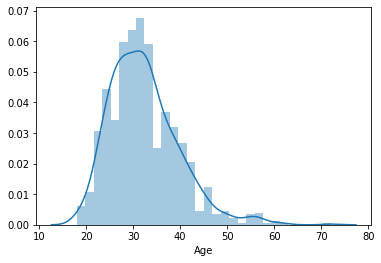

In [538]:
#Age distribution plot
y = df.Age

sns.distplot(y)

In [539]:
df.head(2)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
18,46.0,M,Yes,Yes,No,Sometimes,1-25,Yes,Yes,Yes,...,Yes,Don't know,Yes,Very easy,No,Yes,Yes,No,Yes,Yes
20,29.0,M,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,No,No,Somewhat difficult,Maybe,Some of them,Some of them,No,No,No


In [540]:
#Target and independent variables

X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

In [541]:
y.value_counts()

Sometimes    458
Never        207
Rarely       170
Often        142
Name: work_interfere, dtype: int64

# Creating Sets¶


In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

In [543]:
cont = X_train.select_dtypes(exclude='object')

cat = X_train.select_dtypes(include='object')

In [544]:
y_train.value_counts()

Sometimes    361
Never        164
Rarely       139
Often        117
Name: work_interfere, dtype: int64

# One hot encoder


In [545]:
ohe = OneHotEncoder(drop='first')

In [546]:
train = ohe.fit_transform(cat).toarray()

In [547]:
train_df= pd.DataFrame(train, columns=ohe.get_feature_names(cat.columns))
train_df.head()

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,mental_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [548]:
train_df.reset_index(inplace=True, drop=True)

In [549]:
cont.reset_index(inplace=True, drop=True)

In [550]:
X_train = train_df.join(cont)

In [551]:
X_train.shape

(781, 39)

# Logistic Regression

In [552]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e12, solver='liblinear')

model = logreg.fit(X_train, y_train)

In [553]:
model.classes_

array(['Never', 'Often', 'Rarely', 'Sometimes'], dtype=object)

In [554]:
df_coef = pd.DataFrame(model.coef_, index=model.classes_)


In [555]:
df_coef.columns = [X_train.columns]

Use the coefficient to determine whether a change in a predictor variable makes the event more likely or less likely. 

In [584]:
df_coef.index

Index(['Never', 'Often', 'Rarely', 'Sometimes'], dtype='object')

# PCA

In [587]:
from sklearn.decomposition import PCA
pca = PCA()
p_df = pca.fit(X_train)

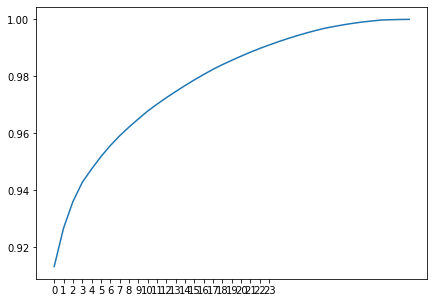

In [589]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(p_df.explained_variance_ratio_))
plt.xticks(range(24))
plt.show()

# Random Forest

In [568]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

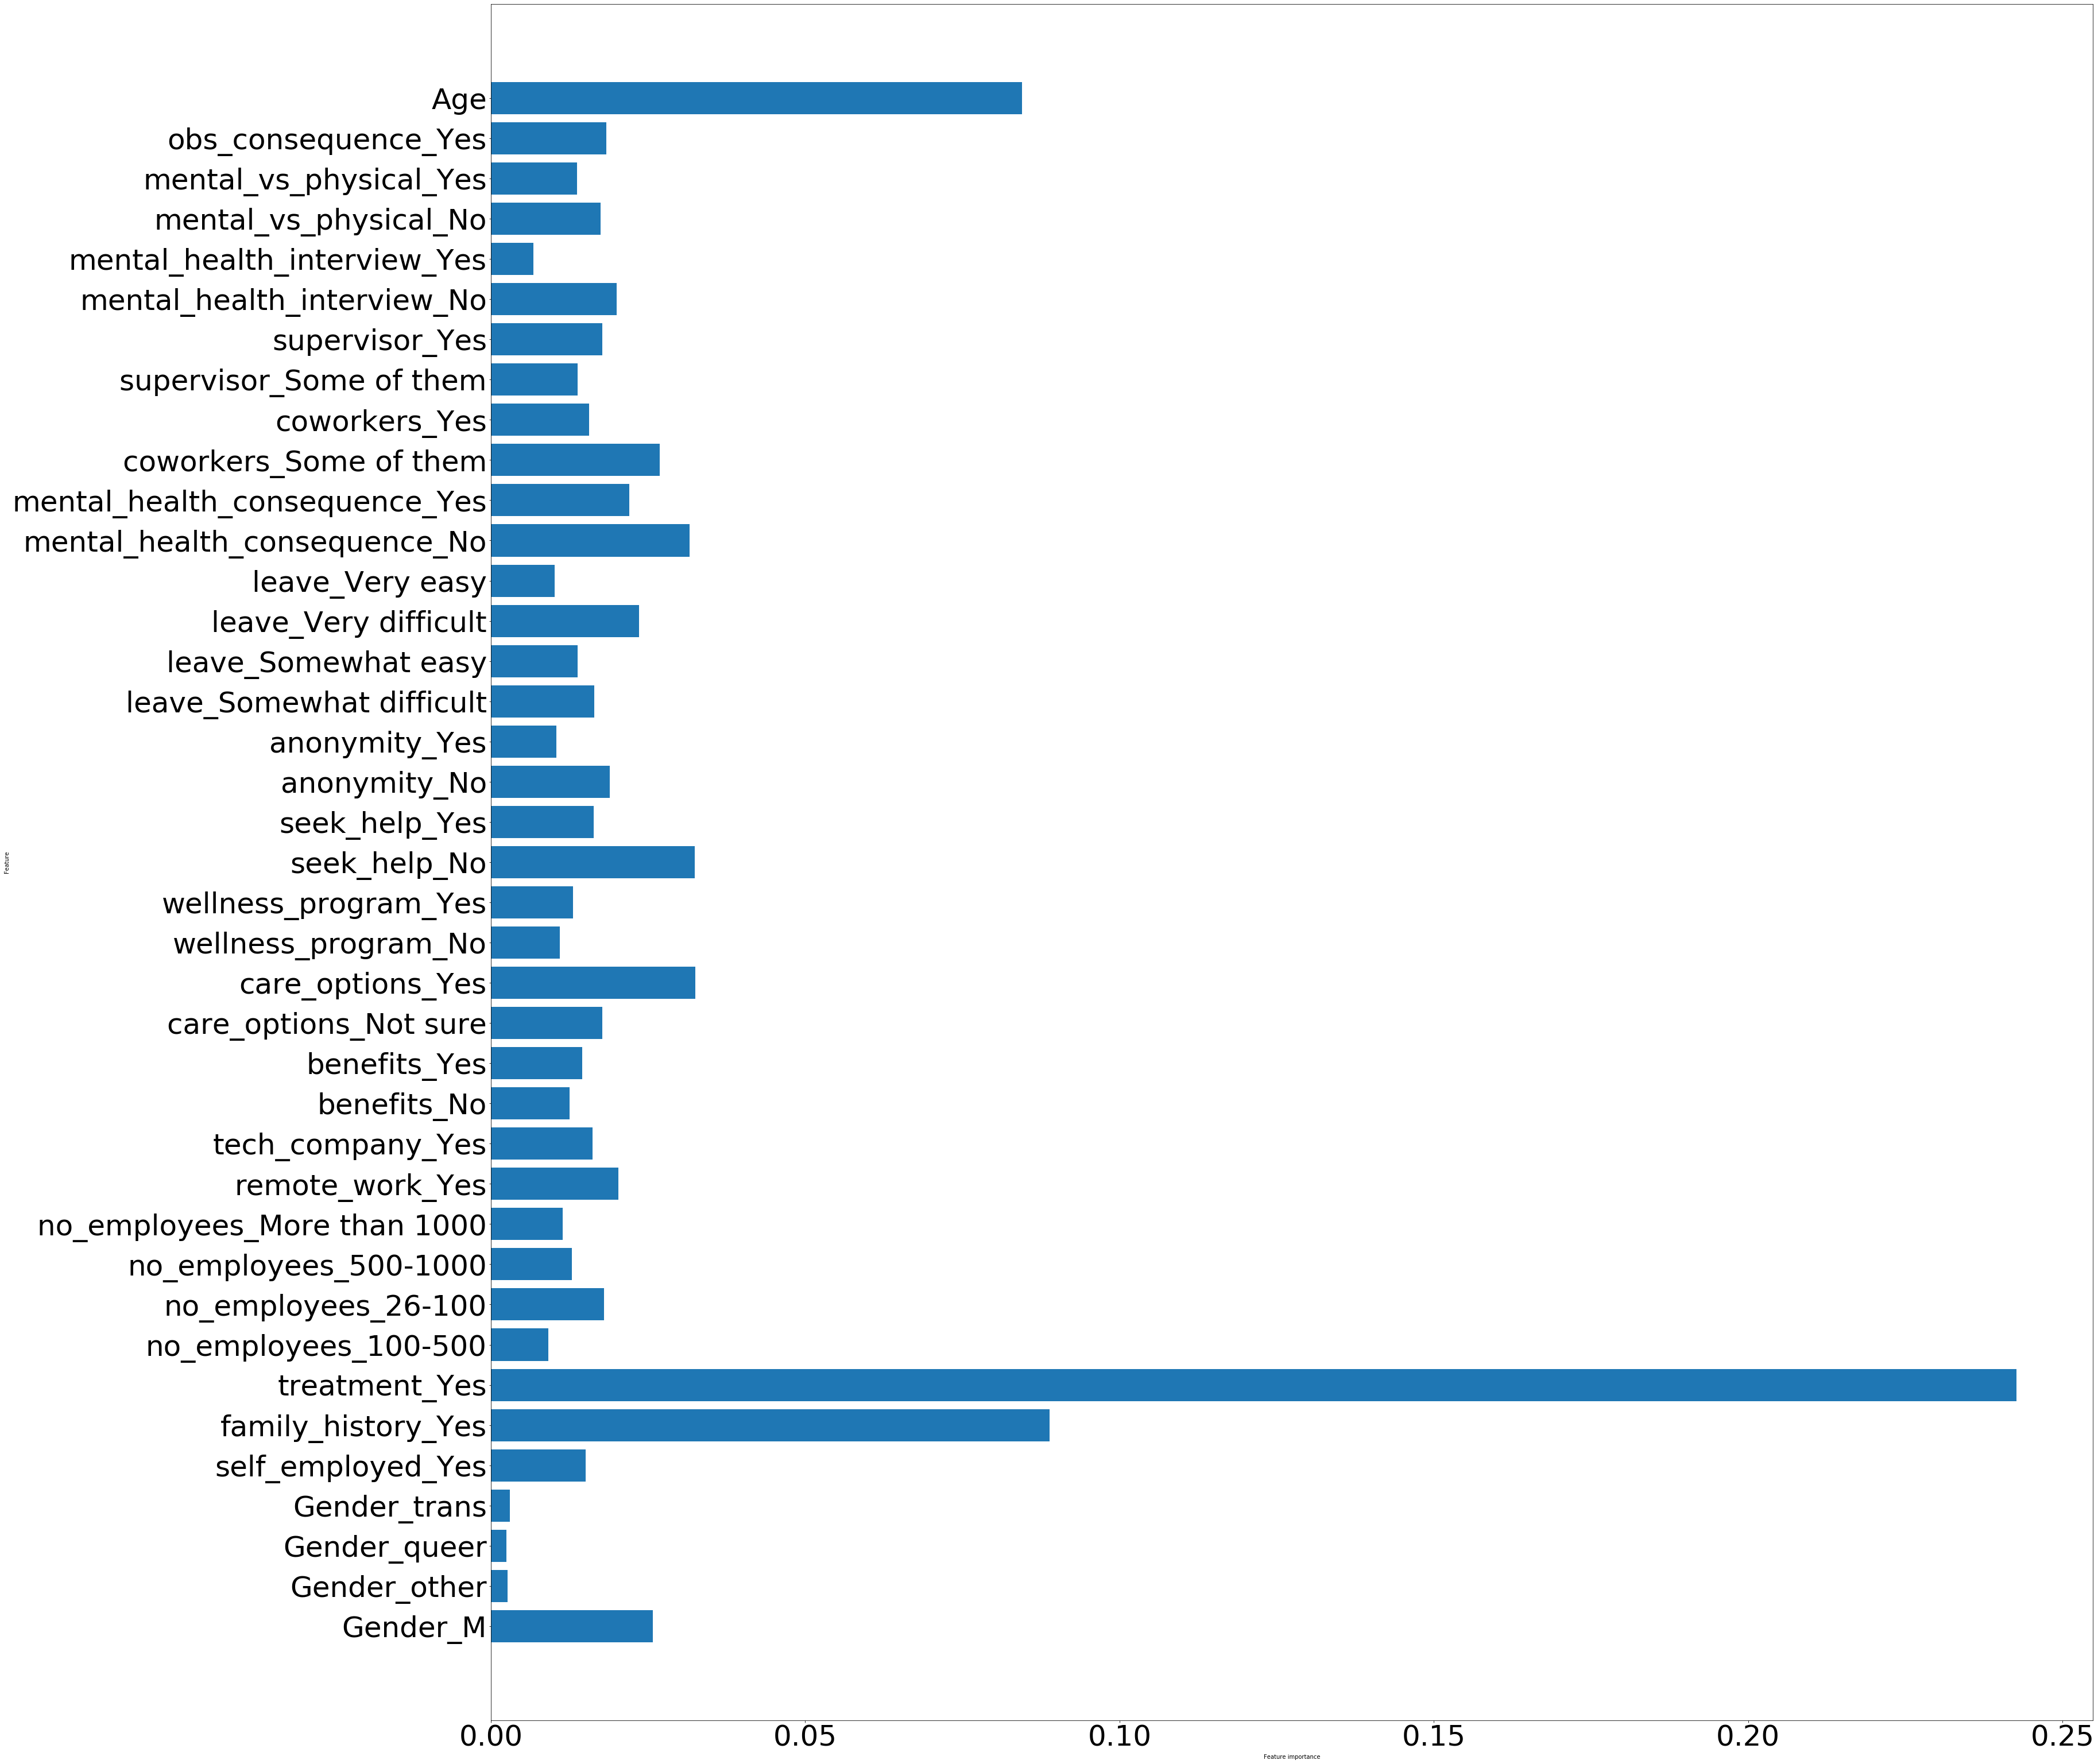

In [569]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(50,55))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance', fontsize=10)
    plt.ylabel('Feature')
    plt.yticks(fontsize=50)
    plt.xticks(fontsize=50)

plot_feature_importances(forest)

In [570]:

forest.score(X_train, y_train)

0.58898847631242

In [571]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


bagged_tree = BaggingClassifier()

In [572]:

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [573]:
bagged_tree.score(X_train, y_train)

0.9884763124199744

# SMOTE

SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [575]:
!pip install imblearn

  Using cached imbalanced_learn-0.6.2-py3-none-any.whl (163 kB)


In [598]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=28)
X_strain, y_strain = sm.fit_sample(X_train, y_train)

In [599]:
y_strain.value_counts()

Often        361
Never        361
Sometimes    361
Rarely       361
Name: work_interfere, dtype: int64

In [614]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

smote_model= forest.fit(X_strain, y_strain)

In [616]:
smote_model.score(X_strain, y_strain)

0.7202216066481995

In [617]:
features = smote_model.feature_importances_

In [613]:
#pd.DataFrame(forest.feature_importances_)
smote_df = pd.DataFrame(X_strain.columns)
smote_df['features'] = forest.feature_importances_
smote_df.head()

,0,features
0,Gender_M,0.039974
1,Gender_other,0.001010
2,Gender_queer,0.000555
3,Gender_trans,0.000717
4,self_employed_Yes,0.021884


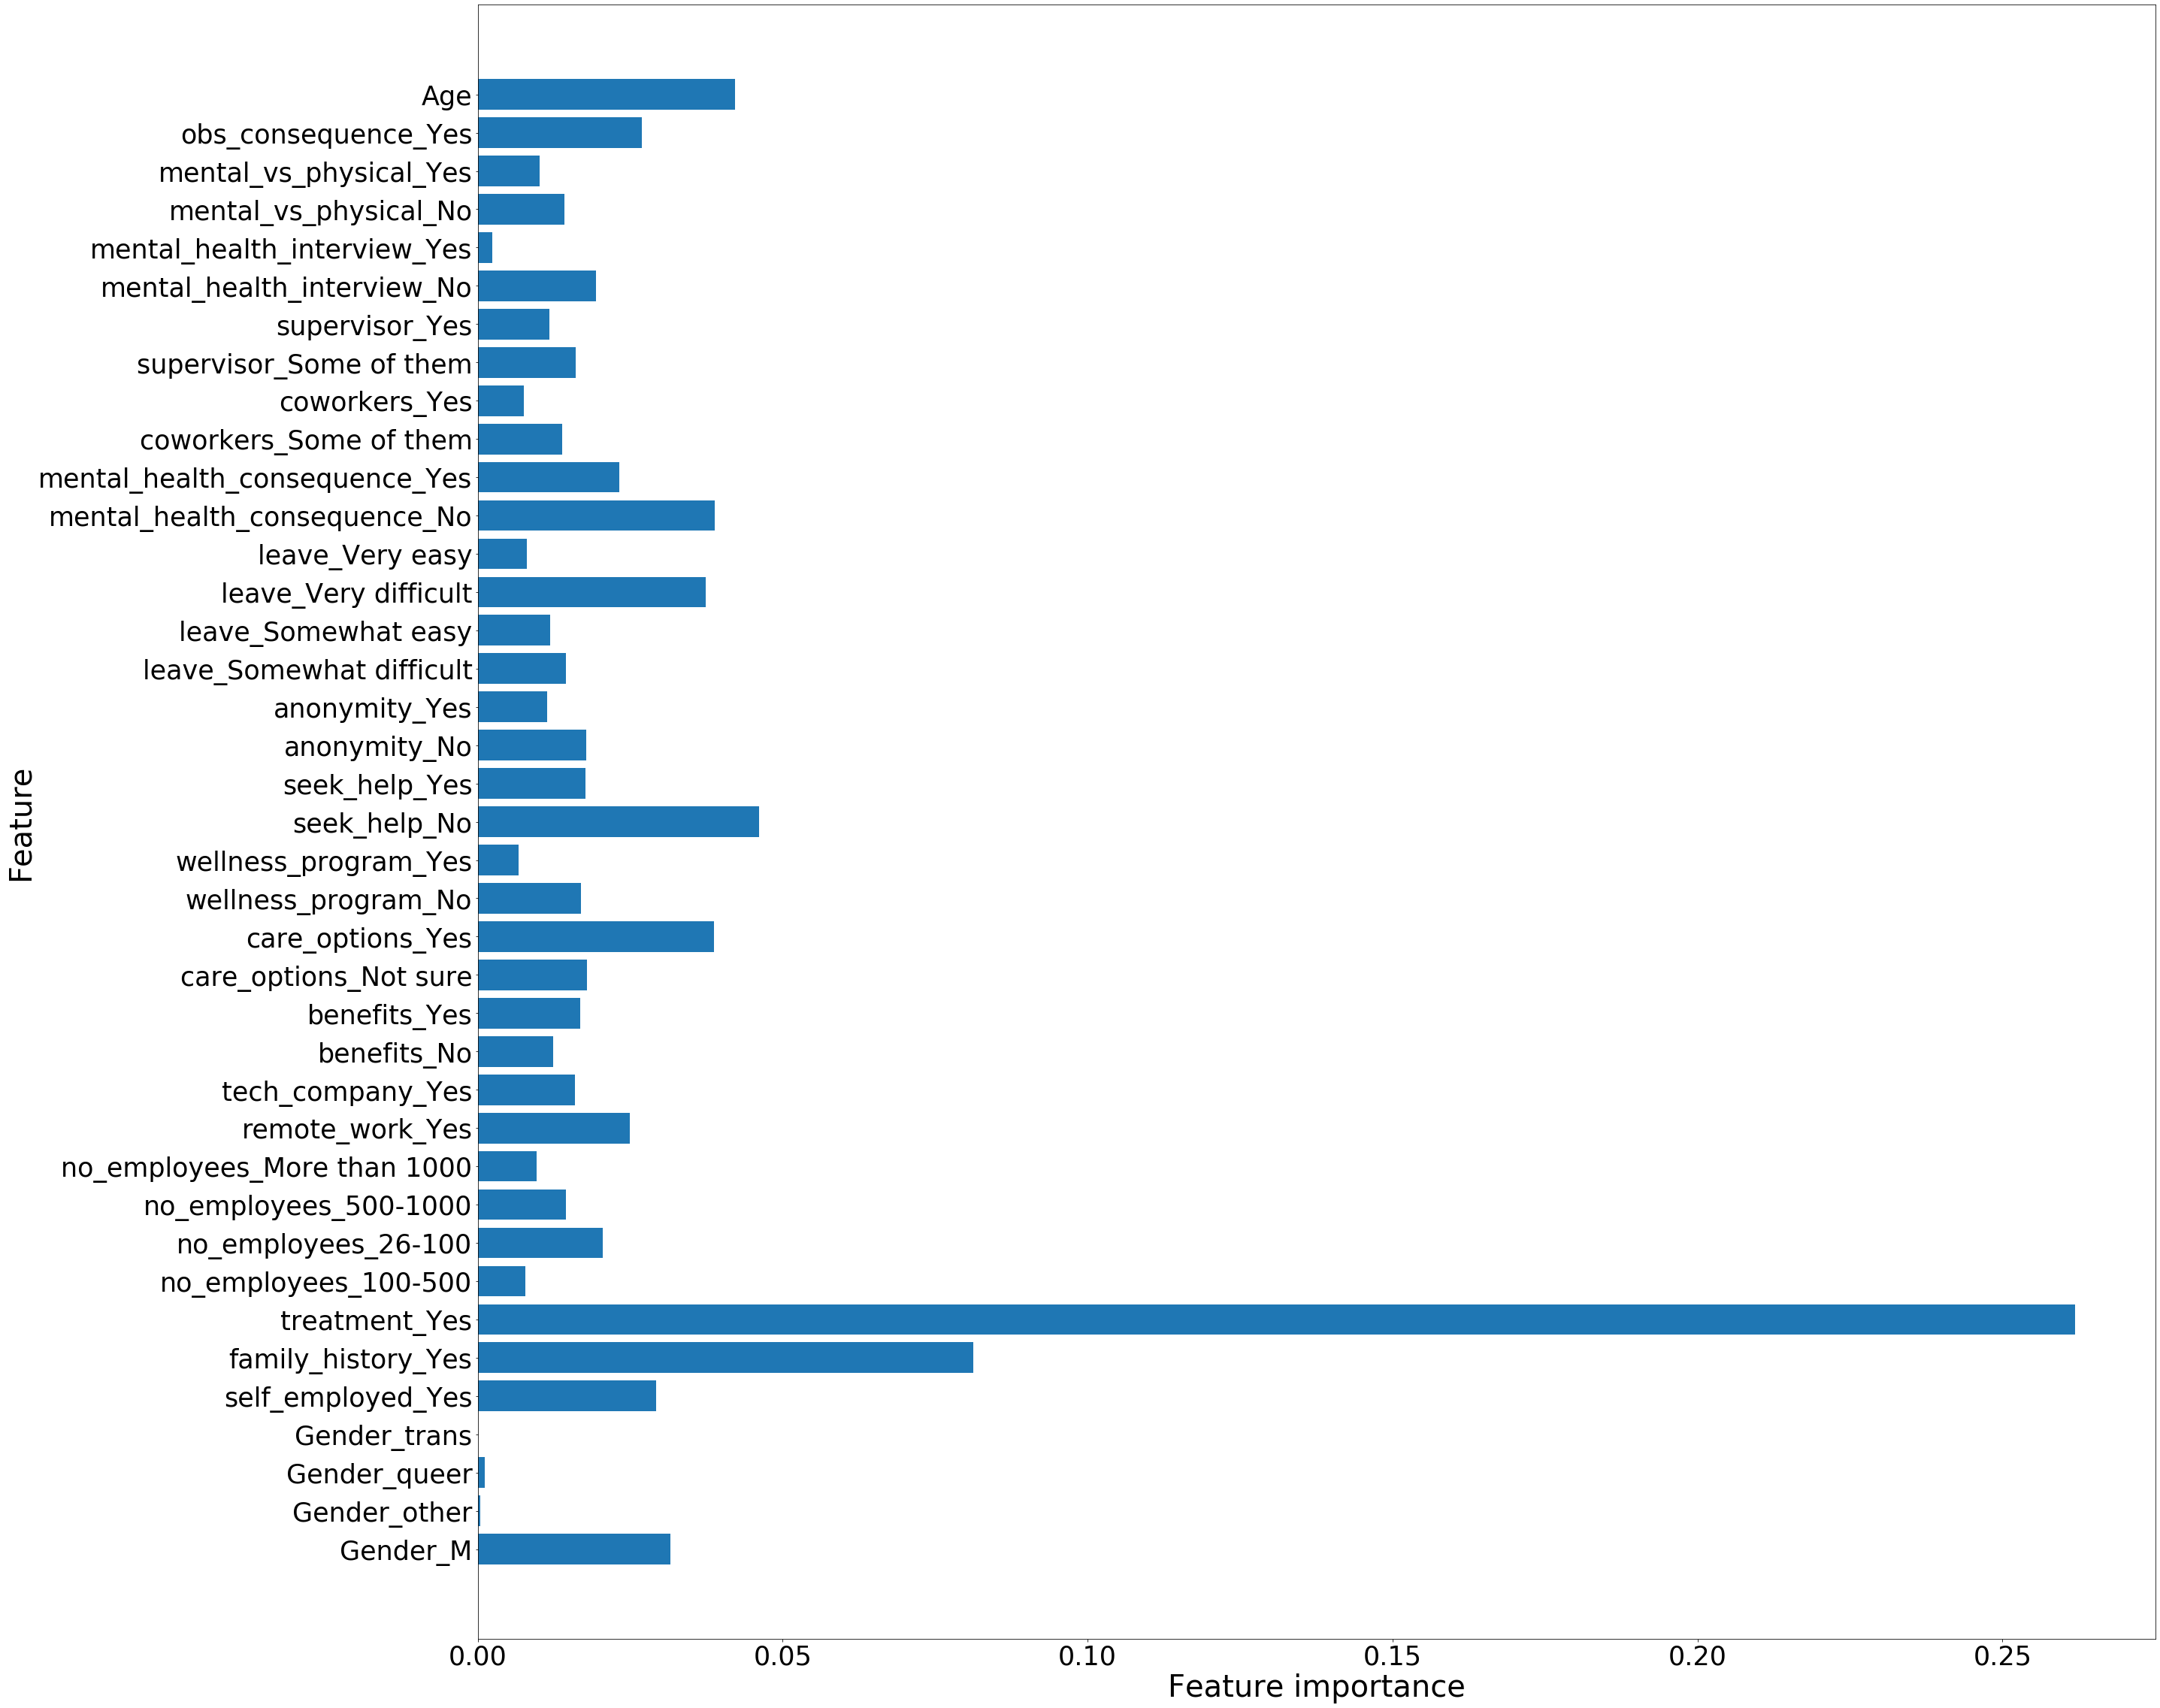

In [629]:
def plot_feature_importances(model):
    n_features = X_strain.shape[1]
plt.figure(figsize=(40,40))
plt.barh(range(n_features), features, align='center')
plt.yticks(np.arange(n_features), X_strain.columns.values) 
plt.xlabel('Feature importance', fontsize=40)
plt.ylabel('Feature', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plot_feature_importances(smote_model)